# Cellular Automata Log Book
### by Frederico Wieser

### Date: 01/02/2020

### Introduction

In this notebook we will explore cellular automata (CA). This jupyter notebook will act as the logbook for the PHAS0030 Mini-Project, "CELLULAR  AUTOMATA:  SEA  SHELLS,  LIFE,  AND  FOREST FIRES".

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Theory Behind Cellular Automata

The theory behind a CA was first ever thought about and discovered by John von Neumann in the 1940s[2]. It was not until the 1970s that people outside of the realm of academia even gave this subject much thought, which was due to the creation of Conway's Game of Life, which is one of the most famous CA ever.

Every CA is essetially the same in terms of it's general structure:

1. Begin with a grid of some sort. This grid can have as many dimensions as you may want. Their should be multiple points in this grid where a value can be stored.

2. Begining with an initial state of the grid, known as your initial CA. Where each point in our CA is assigned a value.

3. Calculate the next state of the CA using a mathematical function or algorithm which you have chosen.

4. Store this new grid of values, which known as your current CA.

5. Use you current CA as your initial CA and repeat step 3 for as long as you want.

This is essentially how a CA works.

Before continuing it is important to get terminology out of the way:

### Definitions

- **Rule:** The whole description of how a cell will be updated based on the configuration of its neighbours.

- **States:** The number of components of each CA rule.

### Outline of All Programs

1. Create Initial State

2. Write an update function, which will take the list of cell values at time step $n$ and return the values at time step $n+1$

3. Output Next state, repeat

### Date: 03/02/2020

### Discussion 1

Today was also the first day in which I met my supervisor Rob Verheyen. He spoke to us about the basic structure and approach we should take to the project and what resources to best utilise during this time. The project he also commented should not take incredibly long to program and can be done fairly quickly with some dedication. Refering to online resources will likely be the best way to learn and get the actual programming done.

### Important Note

In the logbook I have reffered to all cellular automata as CA.

### Aim

The aim of the mini-project is to follow the script in which we have been given and explore in a scientific manner some of the models in which we have been asked to program.

The aim of this project is also to write Python programs to follow the behaviour of simple cellular automata.

We will begin our exploration by starting with Program 1.

### Date: 06/02/2020

## Program 1, Elementary Cellular Automata

### Brief

A two-state automaton, and base the value of cell $p$ on the sum of the values of cells $p-1$, $p$ and $p+1$ at the previous time step.

### Attempt 1

In the following attempts I look at how I could implement the rule where we take the total of cells $p-1$, $p$ and $p+1$ and use the remainder of that total when divided by 2 to define the $p$ cell value.

I am doing this to be able to have an understanding first of how to construct a CA, before moving on to the other programs outlined.

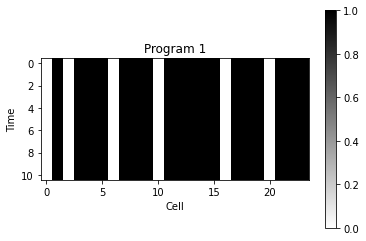

In [2]:
time = 10 # Number of timesteps

# Initialising the cellular automaton arry
CA_0 = np.array([0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,0,1,1,1,0,1,1,1])
CA = []
CA.append(CA_0)

def update(CA):
    """
    Update function, which will take the list of cell values at time
    step n and return the values at time step n+1
    """

    CA_next = CA
    
    # for loop to calculate the next CA using the rules named above
    for p in range(1,len(CA_next)-1):
        CA_next[p] = np.remainder(CA_next[p-1] + CA_next[p] + CA_next[p+1], 2)

    return CA_next

# creating a loop to see how the system evolves over time
for t in range(time):
    CA_current = CA[t]
    CA_next = update(CA_current)
    CA.append(CA_next)

im = plt.imshow(CA, cmap='binary')
plt.title("Program 1")
plt.ylabel("Time")
plt.xlabel("Cell")
plt.colorbar()
plt.show()

### Review of Attempt 1

It seems that this code has not been succesful in implementing the update rule I had wanted to have correctly. What has happened, after reading some of the Numpy documentation, seems to be that the Numpy remainder function is not compatipable with the normal array structure in python.

To solve this problem we are going to use the in built remainder function of python, which is `%` instead of `np.remainder()`.

### Attempt 2

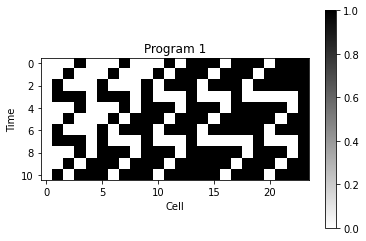

In [3]:
time = 10 # Number of timesteps

# Initialising the cellular automaton arry
CA_0 = [0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,0,1,1,1,0,1,1,1]
CA = []
CA.append(CA_0)
CA_np = np.array([CA_0])

def update_CA(CA):
    """
    Update function, which will take the list of cell values
    at time step n and return the values at time step n+1
    """

    CA_next = CA

    for p in range(1,len(CA_next)-1):
        CA_next[p] = (CA_next[p-1] + CA_next[p] + CA_next[p+1])%2

    return CA_next

for t in range(time):
    #print("Time: " + str(t))
    CA_current = CA[t]
    #print("CA_current: " + str(CA_current))
    CA_next = update_CA(CA_current)
    CA_next_np = np.array([CA_next])
    #print("CA_current: " + str(CA_next_np))
    CA_np = np.concatenate((CA_np, CA_next_np), axis=0)
    #print("CA_next: " + str(CA_next))
    CA.append(CA_next)
    
plt.imshow(CA_np, cmap='binary')
plt.colorbar()
plt.title("Program 1")
plt.ylabel("Time")
plt.xlabel("Cell")
plt.show()

### Review of Attempt 2

We have been able now to get Program 1 to work. In this update function though we have not been updating the last and first cells of the CA. As can be seen in the figure above.

### Attempt 3

In this attempt I have now created 3 functions in the first code cell and in the next code cell have shown examples of the functions we have written being used.

The first function, `rule0` is the same update function as in Attempt 2.

The second function is the same as the first function except we have now used `np.roll()` in order to allow the function to have a circular boundary. This meaning that when we are looking at the last cell we take the sum of the penultimate, last, and first cells.

The third function is used so that when we are running simulations we are able to have less lines of code by simply inputing our initial CA, the number of time steps, and the update rule into the function and receiving our fully complied  simulation as an array of all the CA for every time step.

In [4]:
def rule0(CA):
    """
    Update function, which will take the list of cell values
    at time step n and return the values at time step n+1
    """

    CA_next = CA

    for p in range(1,len(CA_next)-1):
        CA_next[p] = (CA_next[p-1] + CA_next[p] + CA_next[p+1])%2

    return CA_next

def rule1(CA):
    """
    Update function, which will take the list of cell values
    at time step n and return the values at time step n+1.
    
    In this scenario we also have decided to implement a circular
    pattern in the code versus the other codings of this rule.
    """
    CA_next = CA
    
    for p in range(0,len(CA_next)):
        CA_m1 = np.roll(CA, -1)
        CA_p1 = np.roll(CA, 1)
        CA_next[p] = (CA_m1[p]  + CA[p] + CA_p1[p])%2

    return CA_next

def CA_1D(rule, CA0, timesteps):
    """
    A function which is able to take a CA and return a fully complied
    simulation as an array of all the CA for every time step.
    
    Inputs:
    rule = A python function that computes the value of a cell at 
            position p and is where our rule for our CA is stated.
    CA0 = The initial numpy array of our function
    timesteps = The number of time steps the user wants to evolve the system by.

    Outputs:
    CA_Full = A 2D numpy array, where each row represents the 1D CA at the corresponding time step.
    """
    time = timesteps # Number of timesteps
    
    # Initialising CA_Full with first timestep array
    CA_Full = [CA0]
    
    # For loop to calculate and store all the CA for the
    # amount of timesteps called.
    for t in range(time):
        CA_current = CA_Full[t]
        CA_next = rule(CA_current)
        CA_Full = np.concatenate((CA_Full, [CA_next]), axis=0)
    
    CA_Full = CA_Full[:-1] # Adjustment to Fix Plot
    
    return CA_Full

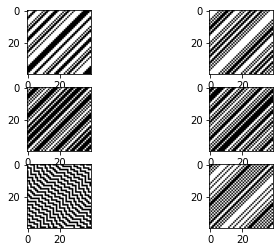

In [5]:
fig = plt.figure()

timesteps = 40
n_plots = 6
columns = 3
rows = n_plots/columns

for i in range(n_plots):
    ax = fig.add_subplot(columns, rows, i+1)
    CA0 = np.random.randint(2, size=40)
    CA = CA_1D(rule1, CA0, timesteps)
    ax.imshow(CA, cmap='binary')

### Review of Attempt 3

Attempt 3 seems to have worked splendidly and we are now able to produce CA very easily. As can be seen in the code cell directly above we have also been able to show this by generating some example CA from a random

### Exploration of Program 1

The goal in this section is to explore the 16 possibilities which we can achieve with Program 1. The 16 possible rules being outlined below.

The number of CA rules is 2 to the power of the number of states:

$$
\therefore R = 2^s
\\
\\
R = \text{number of rules}
\\
\\
s = \text{number of states}
$$

This explains to us why their are 16 possibilities which we can achieve with Program 1. The number of possible values which the sum of cells $p-1$, $p$ and $p+1$ at the previous time step is 0, 1, 2, and 3. This therefore implies we have 4 states and so 16 rules. Since depending on what the sum is we can allocate a binary value to the $p$ cell.

In [6]:
def general_rule(CA, val0, val1, val2, val3):
    """
    Update function, which will take the list of cell values
    at time step n and return the values at time step n+1.
    
    The update is based on the sum of cells [p-1], [p] and [p+1]
    at the previous time step. This value being denoted as "total"
    
    Input:
    CA = Initial CA
    val0 = value returned when total is 0
    val1 = value returned when total is 1
    val2 = value returned when total is 2
    val3 = value returned when total is 3
    """
    CA_next = CA
    
    for p in range(0,len(CA_next)):
        CA_m1 = np.roll(CA, -1)
        CA_p1 = np.roll(CA, 1)
        total = CA_m1[p]  + CA[p] + CA_p1[p]
        if total == 0:
            CA_next[p] = val0
        elif total == 1:
            CA_next[p] = val1
        elif total == 2:
            CA_next[p] = val2
        elif total == 3:
            CA_next[p] = val3

    return CA_next

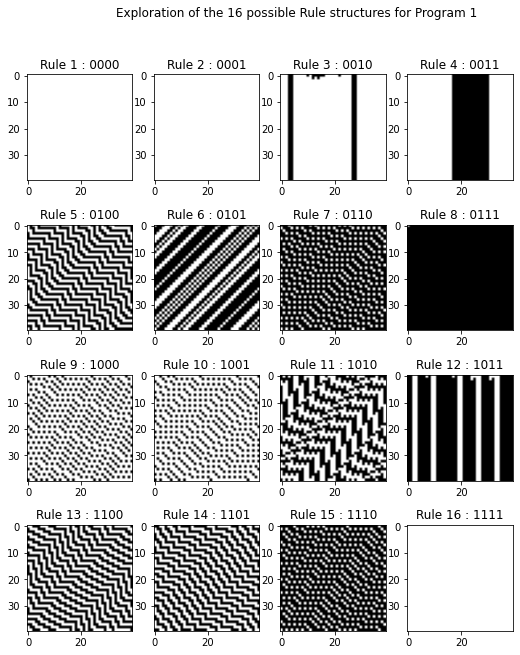

In [7]:
fig = plt.figure(figsize=(10, 10))

timesteps = 40 # Number of timesteps
n_plots = 16
columns = 4
rows = n_plots/columns

# Initialisng plot number
i = 0

# Setting array of binary values for general_rule function
vals = [0,1]

for val0 in vals:
    for val1 in vals:
        for val2 in vals:
            for val3 in vals:
                
                # Adding subplot to figure
                ax = fig.add_subplot(columns, rows, i+1)
                CA0 = np.random.randint(2, size=40)

                # Initialising CA_Full with first timestep array
                CA_Full = [CA0]

                # For loop to calculate and store all the CA for the
                # amount of timesteps called.
                for t in range(timesteps):
                    CA_current = CA_Full[t]
                    CA_next = general_rule(CA_current, val0, val1, val2, val3)
                    CA_Full = np.concatenate((CA_Full, [CA_next]), axis=0)
                    
                CA_Full = CA_Full[:-1]# Adjustment to Fix Plot
                
                ax.set_title("Rule "+str(i+1)+" : "+str(val0)+str(val1)+str(val2)+str(val3))
                ax.imshow(CA_Full, cmap='binary')
                
                i += 1


fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
fig.suptitle("Exploration of the 16 possible Rule structures for Program 1")
fig.savefig("Program 1 Exploration.pdf")

### Review of Program 1

As can be seen from the figure above we have generated 16 plots from initially random CA that have all generated unique patterns. I have run this simulation multiple times with the same results occuring also, this implies that no matter the initial conditions it seems as though the rules applied to a CA have a larger weighting, in this case, then the initial conditions.

### Date: 11/02/2020

## Program 2

### Brief

We now extend the system we had outlined in Program 1 in two ways:

1) Allow it to look more than one step back in time

2) Allow  it  to  involve  more  distant  neighbours

Try  to  find  examples  that  show  very  regular behaviour and examples that look almost random.

### Program 2.1, Spatial Extension

Allow the system to look more than one spatial step. In this case we are going to allow the system to look one more spatial step and have a similar update rule to that of our Program 1. In this case we take the remainder when divided by 2 of the sum of $p-2$, $p-1$, $p$ and $p+1$

### Program 2.2, Temporal Extension

Allow it to involve more distant neighbours. In this case we are going to allow the system to look one more temporal step and have a similar update rule to that of our Program 1. In this case we take the remainder when divided by 2 of the sum of $p-1$, $p$, $p+1$ and $p_b+1$. Where $p_b+1$ is the value of the CA at cell $p+1$ from the previous time step.

### Program 2.1 Attempt 1

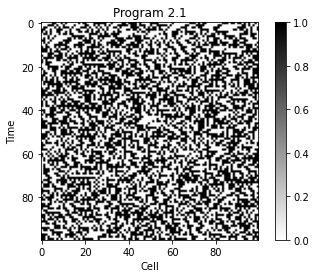

In [8]:
def rule2(CA):
    """
    Update function, which will take the list of cell values
    at time step n and return the values at time step n+1.
    
    Extended in space, by using the same idea as in rule1, except
    we have added the value of the CA at cell p-2.
    """
    CA_next = CA
    
    for p in range(0,len(CA_next)):
        CA_m1 = np.roll(CA, -1)
        CA_p1 = np.roll(CA, 1)
        CA_m2 = np.roll(CA, -2)
        CA_p2 = np.roll(CA, 2)
        
        #CA_next[p] = (CA[p] + CA_m1[p] + CA_p1[p] + CA_m2[p] + CA_p2[p])%2
        CA_next[p] = (CA[p] + CA_m1[p] + CA_p1[p] + CA_m2[p])%2

        
    return CA_next

# Running simulation
CA0 = np.random.randint(2, size=100)
timesteps = 100
CA = CA_1D(rule2, CA0, timesteps)

# Plotting simulation
plt.imshow(CA, cmap='binary')
plt.colorbar()
plt.title("Program 2.1")
plt.ylabel("Time")
plt.xlabel("Cell")
plt.savefig("program21.pdf")
plt.show()

### Review of Program 2.1

As we can see in the figure above we seem to have generated a quite random pattern from our 1 dimensional CA. This has been simply from extending our rule by 1 more spatial step.

### Program 2.2 Attempt 1

In [9]:
def rule3(CA, CA_prev):
    """
    Update function, which will take the list of cell values
    at time step n and return the values at time step n+1.
    
    Extended in time, by using the same idea as in rule1, except
    we have added the value of the CA at cell p+1 from the previous
    time step.
    """
    CA_next = CA
    
    for p in range(0,len(CA_next)):
        CA_m1 = np.roll(CA, -1)
        CA_p1 = np.roll(CA, 1)
        CA_m2 = np.roll(CA, -2)
        CA_p2 = np.roll(CA, 2)
        CA_prev_p1 = np.roll(CA_prev, 1)
        
        #CA_next[p] = (CA[p] + CA_m1[p] + CA_p1[p] + CA_m2[p] + CA_p2[p])%2
        CA_next[p] = (CA[p] + CA_m1[p] + CA_prev_p1[p])%2

    return CA_next

def CA_1D_time(rule, CA0, timesteps):
    """
    A function which is able to take a CA and return a fully complied
    simulation as an array of all the CA for every time step.
    
    Inputs:
    rule = A python function that computes the value of a cell at 
            position p and is where our rule for our CA is stated.
    CA0 = The initial numpy array of our function
    timesteps = The number of time steps the user wants to evolve the system by.

    Outputs:
    CA_Full = A 2D numpy array, where each row represents the 1D CA at the corresponding time step.
    """
    time = timesteps # Number of timesteps
    
    # Initialising CA_Full with first timestep array
    CA_Full = [CA0]
    
    CA_current = CA_Full[0]
    CA_next = rule2(CA_current)
    CA_Full = np.concatenate((CA_Full, [CA_next]), axis=0)
    
    for t in range(1,time):
        CA_previous = CA_Full[t-1]
        CA_current = CA_Full[t]
        CA_next = rule(CA_current, CA_previous)
        CA_Full = np.concatenate((CA_Full, [CA_next]), axis=0)
    
    CA_Full = CA_Full[:-1]
    
    return CA_Full

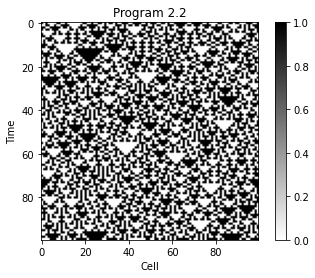

In [10]:
# Running simulation
CA0 = np.random.randint(2, size=100)
timesteps = 100
CA_Full = CA_1D_time(rule3, CA0, timesteps)

# Plotting simulation
plt.imshow(CA_Full, cmap='binary')
plt.colorbar()
plt.title("Program 2.2")
plt.ylabel("Time")
plt.xlabel("Cell")
plt.savefig("program22.pdf")
plt.show()

### Review of Program 2.2

As we can see in the figure above we seem to have generated a quite regualr behaviour from our 1 dimensional CA. This has been simply from extending our rule by 1 more temporal step.

### Date: 29/02/2020

## Program 3, Conway's Game of Life

### Brief

Set up a Python code to show the pattern of cells as a function of time. Start with a random collection of live cells: you should find that it evolves into a relatively sparse pattern.

Compare configurations at successive time steps when the density of live cells is low: can you identify any small stable groups of cells.

You might like to check your program by starting with a block of cells that is empty except for a block near the centre like this: you should find that it ‘glides’ towards the bottom left (it alters its shape on the way).

### Description

In this section we will now look at a 2 dimensional CA instead of 1 dimensional CA. It would be ideal in this case if we could then also figure out how to be able to animate our 2 Dimensional Array since this would allow us to be able to use demonstrate our 2 dimensional CAs in a much better fashion.

In the following program we are going to be working on reproducing one of the most famous CA in all of history, Conway's Game of Life.

1) A dead cell with exactly three living neighbours becomes alive.

2) A living cell with two or three living neighbours remains alive.

3) In all other cases, the cell becomes (or remains) dead.

In the game of life we define the neighbours of a cell to be the Moore neighborhood definition (https://en.wikipedia.org/wiki/Moore_neighborhood).

Where all cells touching the the cell in question are it's neighbours including where they only touch at the corners. Meaning the cell has 8 neighbours.

Interesting Sources of How other people have implemented the Game of Life:

- https://www.geeksforgeeks.org/conways-game-life-python-implementation/
- https://towardsdatascience.com/from-scratch-the-game-of-life-161430453ee3
- https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/
- https://medium.com/@martin.robertandrew/conways-game-of-life-in-python-2900a6dcdc97
- https://medium.com/better-programming/how-to-write-conwells-game-of-life-in-python-c6eca19c4676

### Important Note

In order to create the animation you see below I have taken inspiration and tried to implement a similar method to that which is outlined here:

- https://matplotlib.org/2.1.2/gallery/animation/dynamic_image.html

### Note

In order to create an update function I have decided to take an approach where we copy the initial array in which we input to our update function and from there create an array called `sum_parts`.

This array initially is identical in size except our goal is to add a border around the array of 0 value cells. We do this so that we can apply an update function which stores the value of the Moore neighborhood sum around and including a cell with coordinates $(i, j)$ in the original `CA` in the coordinates $(i+1, j+1)$ in `sum_parts`. The function then uses the value of $(i+1, j+1)$ in `sum_parts` to set the value $(i, j)$ in the next timestep of the original `CA`.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def Update(CA):
    """
    Conway's Game of Life Python Implementation
    """
    size = CA.shape[0]
    
    # Initialisng sum_parts
    sum_parts = np.zeros((size+2,size+2))
    
    # Adding all the values of the initial CA to sum_parts
    sum_parts[0:-2, 1:-1] += CA
    sum_parts[2:  , 1:-1] += CA
    sum_parts[1:-1, 0:-2] += CA
    sum_parts[1:-1, 2:] += CA
    sum_parts[0:-2, 0:-2] += CA
    sum_parts[2:  , 0:-2] += CA
    sum_parts[0:-2, 2:] += CA
    sum_parts[2:  , 2:] += CA

    # Implementation of the rules for Conway's Game of Life
    for x in range(0, size):
        for y in range(0, size):
            if(CA[x,y]==0 and sum_parts[x+1,y+1]==3):
                CA[x,y] = 1
            elif(CA[x,y] == 1 and (sum_parts[x+1,y+1]==2 or sum_parts[x+1,y+1] ==3)):
                CA[x,y] = 1
            else:
                CA[x,y] = 0

    return CA

def anim_func(i):
    """
    Animation Function
    """
    im.set_array(all_CA[i])
    return [im]

### Random Initial CA simulation

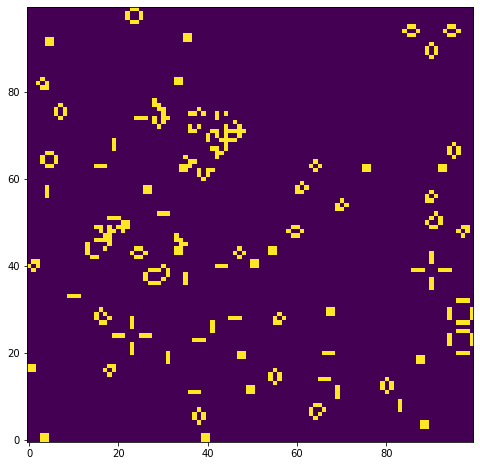

In [12]:
# Initialising simulation
CA_size = 100
CA = np.random.randint(2, size=(CA_size,CA_size))
all_CA = []
all_CA.append(CA)

timesteps = 1000

# Running simulation
for i in range(timesteps):
    CA = Update(CA)
    all_CA.append(np.copy(CA))

# Animating and plotting simulation
fps = 20 # Frames per second of simulation
fig = plt.figure(figsize=(8,8))
im = plt.imshow(all_CA[0], origin='lower', interpolation='none', aspect='auto', vmin=0, vmax=1)

anim = animation.FuncAnimation(
                                fig,
                                anim_func,
                                frames= len(all_CA) * fps,
                                interval = 1000 / fps
                                )

### Review of Random Initial CA simulation

The simulation and code have been a success.

When running the code it is clear to see that we can identify a small stable groups of cells in multiple locations which lead to oscillatory behaviour.

### Block of Cells in Centre Simulation

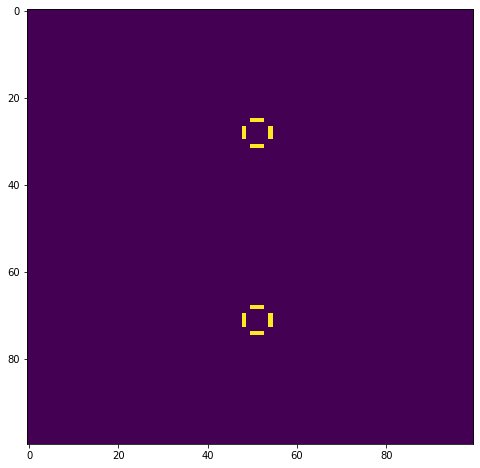

In [13]:
# Initialising simulation
CA_size = 100
CA = np.zeros((CA_size,CA_size))
CA[40:60, 41:62] = 1
all_CA = []
all_CA.append(CA)

timesteps = 300

# Running simulation
for i in range(timesteps):
    CA = Update(CA)
    all_CA.append(np.copy(CA))

# Animating and plotting simulation
fps = 20 # Frames per second of simulation
fig = plt.figure(figsize=(8,8))
im = plt.imshow(all_CA[0], interpolation='none', aspect='auto', vmin=0, vmax=1)

anim = animation.FuncAnimation(
                                fig,
                                anim_func,
                                frames= len(all_CA) * fps,
                                interval = 1000 / fps
                                )

### Review of Block of Cells in Centre Simulation

When running the code it is unclear that we see any ‘gliding’ towards the bottom left corner. The simulation has been run over 20 initial configurations where the group of cells in the centre has been defined.

I am not exactly sure where I could be going wrong and it would most likely be ideal to speak to my supervisor about this topic.

### Date: 08/03/2020

## Program 4, Forest Fire Simulation

In this program simulate a forest fire when one inputs the an initial cellular automata which is representative of the forest. In this simulation we have 3 values which a cell is able to take:

- 0 = burnt-out/dead forest
- 1 = green/alive forest
- 2 = burning forest

In this simulation we are also going to be using the Von Neumann neighborhood(https://en.wikipedia.org/wiki/Von_Neumann_neighborhood) as our way of defining the value of our $(i, j)$ cell.

The following rules apply in this case:

- A burnt-out/dead (0) forest sprouts green/alive forest with a probability $p$ per cell per time step.
- if a cell is burning (2), then in the next time step any neighbouring cell that were previously green/alive forest (1) will catch fire.
- a burning (2) cell that was alight will become burnt-out/dead (0) forest in the next time step.
- lightning may strike, allowing any green/alive (1) forest cell to catch fire becoming burning (2) forest with probability $f$ per cell per timestep.

In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

def ForrestFire(CA, p, f):
    """
    This function simulates a forest fire when one inputs the an
    initial cellular automata. And outputs the state of the forest
    fire at the next time step.

    Input:
    CA = initial state of forest
    p = probability burnt-out forest sprouts green forest
    f = probability lightning may strike, allowing any green
        forest cell to catch fire
        
    Output:
    next_CA = the next CA after 1 timestep
    dead = number of dead cells in next_CA
    alive = number of alive cells in next_CA
    burning = number of burning cells in next_CA
    """

    # Finding out the size of the array
    size = CA.shape[0]

    # Initialising the counting of dead, burning and alive
    dead = alive = burning = 0
    
    # Initialising next CA
    next_CA = np.zeros((size,size))
    
    for x in range(0, size):
        for y in range(0, size):
            if(CA[x,y]==0): # If cell is dead
                
                if(np.random.rand(1)<=p): # With probability p
                    next_CA[x,y]=1 # Make it alive
                    alive+=1
                    
                else:
                    # Otherwise we keep it dead
                    next_CA[x,y] = 0
                    dead+=1

            elif(CA[x,y] == 1): # Else if alive
                
                # Check all surrounding tiles if they're on fire.
                # If one is, set alight
                if(x!=0 and CA[x-1,y]==2):
                    next_CA[x,y] = 2
                    burning+=1
                    
                elif(y!=0 and CA[x,y-1]==2):
                    next_CA[x,y] = 2
                    burning+=1
                    
                elif(x!=size-1 and CA[x+1,y]==2):
                    next_CA[x,y] = 2
                    burning+=1
                    
                elif(y!=size-1 and CA[x,y+1]==2):
                    next_CA[x,y] = 2
                    burning+=1
                    
                elif(np.random.rand(1)<=f):
                    next_CA[x,y] = 2
                    burning+=1
                    
                else:
                    # Otherwies, keep alive
                    next_CA[x,y] = 1
                    alive +=1

    return next_CA, dead, alive, burning

After creating this general function, to take in any and all P and F values with an initial CA, I ran the initial simulation which is layed out in the project guidelines. The results are shown in the code cell below.

The initial simulation being where we explore how fires propagate through a 100 by 100 cell forest for 100 time steps. With... 

$p = 0.05$

$f = 0.00025$

With a forest containing no fires but with 30% of the cells occupied by green/alive forest, in the centre.

In [15]:
# Defining initial conditions of the CA.
size = 100
CA = np.zeros((size,size))
CA[35:65, 35:65] = 1

# Defining time arrays.
number_of_timesteps = 100

all_fire = []
all_fire.append(np.copy(CA))
live_number = []
dead_number = []
burnt_number = []

p = 0.05
f = 0.00025

for i in range(number_of_timesteps):
    ali, dead, alive, burning = ForrestFire(all_fire[i], p, f)
    all_fire.append(ali)
    dead_number.append(dead)
    live_number.append(alive)
    burnt_number.append(burning)
    
fig = plt.figure(figsize=(15,8))
#ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(111)
#im = ax1.imshow(CA, vmin=0, vmax=2)
#fig.colorbar(im)

def anim_func(i):
    im.set_array(all_fire[i])

anim = animation.FuncAnimation(fig, anim_func, frames=number_of_timesteps,interval=50)

ax2.plot(live_number, label="Live")
ax2.plot(dead_number,  label="Dead")
ax2.plot(burnt_number, label="Burning")
ax2.set_ylabel("Number of Cells")
ax2.set_xlabel("Time")
ax2.legend()
plt.savefig("Initial Forest Fire.pdf")
plt.show()

<IPython.core.display.Javascript object>

### Review of Program 4

The forest fire simulation and program seem to have worked great!

I did have some problems during the programing of which method should be taken with a program this size. Because of my utilisation of the update function in my simulations it was/is very important that I choose the most efficient implementation, in order to reduce my run time.

I did have some issues where it seemed that my fire would only spread in one quadrant of a cartesian coordinate system, or it would spread in 3 out of 4 the quadrants. This bug has now gone away after I realised that I had placed a `=` in my first `if` statement rather than a `==`.

Overall I am heppy with the program and it seems to have run the project guidelines requested simulation with out trouble.

### Date: 14/03/2020

## Program 5, Large Scale Forest Fire Simulation

The code you see below has been directly copy and pasted from `data_analysis1.py` and has been used to run 441 simulations of the the forest fire for varying values of $p$ and $f$. In the code below you will notice that we have run the simulations over the values:

$$
p = (0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99)
$$

and

$$
f = (0.00025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.999)
$$

These simulations were carried out using the same 30% coverage of green/alive forest, in the centre.

The simulation took a fair amount of time to run, 40 minutes roughly. To run it at this speed though I used the fact that python is unable to support multithreading on a CPU and instead made 10 different Python files and ran different $p$ value arrays on each. This shortened my runtime from 400 minutes to 40, roughly.

In [16]:
###########################
#DO NOT RUN THIS CODE CELL#
###########################

# Defining initial conditions of the CA.
size = 100
CA = np.zeros((size,size))
CA[35:65, 35:65] = 1

# Defining time arrays.
number_of_timesteps = 500
time = range(number_of_timesteps)

# Defining P and F values over which we will be running all
# simulations.
p_max = 1
f_max = 1
p_min = 0
f_min = 0
p_num = 21
f_num = 21
P_array = np.linspace(p_min, p_max, p_num)
F_array = np.linspace(f_min, f_max, f_num)
P_array[0] = 0.001
F_array[0] = 0.00025
P_array[-1] = 0.99
F_array[-1] = 0.999

for p in P_array:
    for f in F_array:
        path = "data/ p" + str(p) + " f " + str(f)
        os.mkdir(path)
        all_fire = []
        all_fire.append(np.copy(CA))
        live_number = []
        dead_number = []
        burnt_number = []
        for i in range(time):
            ali, dead, alive, burning = ForrestFire(all_fire[i], p, f)
            all_fire.append(ali)
            dead_number.append(dead)
            live_number.append(alive)
            burnt_number.append(burning)
            name = "data/ p" + str(p) + " f " + str(f) + "/" + str(i) + ".csv"
            np.savetxt(name, all_fire[i])

        name_1 = "data/ p" + str(p) + " f " + str(f) + "/live_number.csv"
        np.savetxt(name_1, live_number)
        name_2 = "data/ p" + str(p) + " f " + str(f) + "/dead_number.csv"
        np.savetxt(name_2, dead_number)
        name_3 = "data/ p" + str(p) + " f " + str(f) + "/burnt_number.csv"
        np.savetxt(name_3, burnt_number)
        
###########################
#DO NOT RUN THIS CODE CELL#
###########################

FileNotFoundError: [Errno 2] No such file or directory: 'data/ p0.001 f 0.00025'

### Date: 15/03/2020

## Data Analysis

To preform my data analysis, on the all the simulations I ran earlier, I will be importing the csv files I had generated before and turning them into arrays. From these arrays we will then be able to analyse our data better.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Defining P and F values over which we will be running all
# simulations.
p_max = 1
f_max = 1
p_min = 0
f_min = 0
p_num = 21
f_num = 21
P_array = np.linspace(p_min, p_max, p_num)
F_array = np.linspace(f_min, f_max, f_num)
P_array[0] = 0.001
F_array[0] = 0.00025
P_array[-1] = 0.99
F_array[-1] = 0.999

all_burnt_arrays = []
all_dead_arrays = []
all_live_arrays = []

burnt_mean = np.zeros((p_num,f_num))
dead_mean = np.zeros((p_num,f_num))
live_mean = np.zeros((p_num,f_num))

burnt_std = np.zeros((p_num,f_num))
dead_std = np.zeros((p_num,f_num))
live_std = np.zeros((p_num,f_num))

# For loop to extract information from all the csv files which were
# generated. 

i = 0
for p in P_array:
    j = 0
    for f in F_array:

        path = "data/ p" + str(p) + " f " + str(f)

        burnt_array = np.genfromtxt(path + "/burnt_number.csv", delimiter=' ')
        all_burnt_arrays.append(burnt_array)
        sd_b = np.std(burnt_array)
        burnt_std[i,j] = sd_b
        mean_b = np.mean(burnt_array)
        burnt_mean[i,j] = mean_b

        dead_array = np.genfromtxt(path + "/dead_number.csv", delimiter=' ')
        all_dead_arrays.append(dead_array)
        sd_d = np.std(dead_array)
        dead_std[i,j] = sd_d
        mean_d = np.mean(dead_array)
        dead_mean[i,j] = mean_d

        live_array = np.genfromtxt(path + "/live_number.csv", delimiter=' ')
        all_live_arrays.append(live_array)
        sd_l = np.std(live_array)
        live_std[i,j] = sd_l
        mean_l = np.mean(live_array)
        live_mean[i,j] = mean_l

        j += 1
    i += 1

From this point I then used the arrays I had imported to create 3 different types of plots in order to illustrate my data

### Imshow Mean Maps

In [ ]:
# Create Live Cell mean ImShow Map 
fig, ax = plt.subplots(1,1)

mean = live_mean
mean_im = ax.imshow(mean, origin='lower', interpolation='none', extent=[f_min , f_max, p_min , p_max])

ax.set_title("Live Mean")
ax.set_xlabel("F value")
ax.set_ylabel("P value")

cbar = fig.colorbar(mean_im)
cbar.set_label('Number of Cells', rotation=270)
fig.savefig("Live Mean.pdf")
plt.show()

In [ ]:
# Create Dead Cell mean ImShow Map 
fig, ax = plt.subplots(1,1)

mean = dead_mean
mean_im = ax.imshow(mean, origin='lower', interpolation='none', extent=[f_min , f_max, p_min , p_max])

ax.set_title("Dead Mean")
ax.set_xlabel("F value")
ax.set_ylabel("P value")

cbar = fig.colorbar(mean_im)
cbar.set_label('Number of Cells', rotation=270)
fig.savefig("Dead Mean.pdf")
plt.show()

In [ ]:
# Create Burning Cell mean ImShow Map 
fig, ax = plt.subplots(1,1)

mean = burnt_mean
mean_im = ax.imshow(mean, origin='lower', interpolation='none', extent=[f_min , f_max, p_min , p_max])

ax.set_title("Burning Mean")
ax.set_xlabel("F value")
ax.set_ylabel("P value")

cbar = fig.colorbar(mean_im)
cbar.set_label('Number of Cells', rotation=270)
fig.savefig("Burning Mean.pdf")
plt.show()

### Date: 16/03/2020

### 3D Mean Surface Plots

In [ ]:
x2D, y2D = np.meshgrid(F_array, P_array)

X = np.ndarray.flatten(x2D)
Y = np.ndarray.flatten(y2D)

Z1 = np.ndarray.flatten(live_mean)
Z2 = np.ndarray.flatten(dead_mean)
Z3 = np.ndarray.flatten(burnt_mean)

In [ ]:
# Plot the Live Cell mean 3D Surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z1, c='g', marker='o')
surf1 = ax.plot_surface(x2D, y2D, live_mean)

ax.view_init(azim=315)

ax.set_xlabel('F value')
ax.set_ylabel('P value')
ax.set_zlabel('Number of Cells')
fig.suptitle('Mean Number of Live Cells Across Simulations')

fig.savefig("Live Mean 3D.pdf")
plt.show()

In [ ]:
# Plot the Dead Cell mean 3D Surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z2, c='g', marker='o')
surf2 = ax.plot_surface(x2D, y2D, dead_mean)

ax.view_init(azim=135)

ax.set_xlabel('F value')
ax.set_ylabel('P value')
ax.set_zlabel('Number of Cells')
fig.suptitle('Mean Number of Dead Cells Across Simulations')

fig.savefig("Dead Mean 3D.pdf")
plt.show()

In [ ]:
# Plot the Burning Cell mean 3D Surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z3, c='g', marker='o')
surf3 = ax.plot_surface(x2D, y2D, burnt_mean)
ax.view_init(azim=225)

ax.set_xlabel('F value')
ax.set_ylabel('P value')
ax.set_zlabel('Number of Cells')
fig.suptitle('Mean Number of Burning Cells Across Simulations')

fig.savefig("Burning Mean 3D.pdf")
plt.show()

### Imshow Standard Deviation Maps

In [ ]:
# Create Live Cell STD ImShow Map 
fig, ax = plt.subplots(1,1)

std = live_std
std_im = ax.imshow(std, origin='lower', interpolation='none', extent=[f_min , f_max, p_min , p_max])

ax.set_title("Live Standard Deviation")
ax.set_xlabel("F value")
ax.set_ylabel("P value")

cbar = fig.colorbar(std_im)
cbar.set_label('Number of Cells', rotation=270)
fig.savefig("Live STD.pdf")
plt.show()

In [ ]:
# Create Dead Cell STD ImShow Map 
fig, ax = plt.subplots(1,1)

std = dead_std
std_im = ax.imshow(std, origin='lower', interpolation='none', extent=[f_min , f_max, p_min , p_max])

ax.set_title("Dead Standard Deviation")
ax.set_xlabel("F value")
ax.set_ylabel("P value")

cbar = fig.colorbar(std_im)
cbar.set_label('Number of Cells', rotation=270)
fig.savefig("Dead STD.pdf")
plt.show()

In [ ]:
# Create Burning Cell STD ImShow Map 
fig, ax = plt.subplots(1,1)

std = burnt_std
std_im = ax.imshow(std, origin='lower', interpolation='none', extent=[f_min , f_max, p_min , p_max])

ax.set_title("Burning Standard Deviation")
ax.set_xlabel("F value")
ax.set_ylabel("P value")

cbar = fig.colorbar(std_im)
cbar.set_label('Number of Cells', rotation=270)
fig.savefig("Burning STD.pdf")
plt.show()

### Date: 19/03/2020

After reviewing all of the graphs above it is clear to me that their seems to be a slither of interesting behaviour around the really low values of $f$. This has now made me think that it may also be a good idea to run further simulations around the $f=0.00025$ values with a smaller range then I had done before. I am deciding to keep my range of $p$ values the same though since it seems these have also shown interesting properties with the low values of $f$.

With all of this in mind I will be running the simulations over the values:


$p$ = (0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99)


and


$f$ = (1.0e-05, 5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04, 2.5e-04, 3.0e-04, 3.5e-04, 4.0e-04, 4.5e-04, 5.0e-04, 5.5e-04, 6.0e-04, 6.5e-04, 7.0e-04, 7.5e-04, 8.0e-04, 8.5e-04, 9.0e-04, 9.5e-04, 1.0e-03)

These simulations were carried out using the same 30% coverage of green/alive forest, in the centre.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Defining P and F values over which we will be running all
# simulations.
p_max = 1
f_max = 0.001
p_min = 0
f_min = 0
p_num = 21
f_num = 21
P_array = np.linspace(p_min, p_max, p_num)
F_array = np.linspace(f_min, f_max, f_num)
P_array[0] = 0.001
F_array[0] = 0.00001
P_array[-1] = 0.99

all_burnt_arrays = []
all_dead_arrays = []
all_live_arrays = []

burnt_mean_2 = np.zeros((p_num,f_num))
dead_mean_2 = np.zeros((p_num,f_num))
live_mean_2 = np.zeros((p_num,f_num))

burnt_std_2 = np.zeros((p_num,f_num))
dead_std_2 = np.zeros((p_num,f_num))
live_std_2 = np.zeros((p_num,f_num))

# For loop to extract information from all the csv files which were
# generated. 

i = 0
for p in P_array:
    j = 0
    for f in F_array:

        path = "data2/ p" + str(p) + " f " + str(f)

        burnt_array = np.genfromtxt(path + "/burnt_number.csv", delimiter=' ')
        all_burnt_arrays.append(burnt_array)
        sd_b = np.std(burnt_array)
        burnt_std_2[i,j] = sd_b
        mean_b = np.mean(burnt_array)
        burnt_mean_2[i,j] = mean_b

        dead_array = np.genfromtxt(path + "/dead_number.csv", delimiter=' ')
        all_dead_arrays.append(dead_array)
        sd_d = np.std(dead_array)
        dead_std_2[i,j] = sd_d
        mean_d = np.mean(dead_array)
        dead_mean_2[i,j] = mean_d

        live_array = np.genfromtxt(path + "/live_number.csv", delimiter=' ')
        all_live_arrays.append(live_array)
        sd_l = np.std(live_array)
        live_std_2[i,j] = sd_l
        mean_l = np.mean(live_array)
        live_mean_2[i,j] = mean_l

        j += 1
    i += 1

The code used for this simulation is the same as the one from Program 5 except for the new range of $f$ and $p$ values we are testing.

### Imshow Mean Maps

In [ ]:
# Create Live Cell mean ImShow Map 
fig, ax = plt.subplots(1,1)

mean = live_mean_2
mean_im = ax.imshow(mean, origin='lower', interpolation='none')

ax.set_title("Live Mean")
ax.set_xlabel("F value")
ax.set_ylabel("P value")

cbar = fig.colorbar(mean_im)
cbar.set_label('Number of Cells', rotation=270)
fig.savefig("Live Mean 2.pdf")
plt.show()

In [ ]:
# Create Dead Cell mean ImShow Map 
fig, ax = plt.subplots(1,1)

mean = dead_mean_2
mean_im = ax.imshow(mean, origin='lower', interpolation='none')

ax.set_title("Dead Mean")
ax.set_xlabel("F value")
ax.set_ylabel("P value")

cbar = fig.colorbar(mean_im)
cbar.set_label('Number of Cells', rotation=270)
fig.savefig("Dead Mean 2.pdf")
plt.show()

In [ ]:
# Create Burning Cell mean ImShow Map 
fig, ax = plt.subplots(1,1)

mean = burnt_mean_2
mean_im = ax.imshow(mean, origin='lower', interpolation='none')

ax.set_title("Burning Mean")
ax.set_xlabel("F value")
ax.set_ylabel("P value")

cbar = fig.colorbar(mean_im)
cbar.set_label('Number of Cells', rotation=270)
fig.savefig("Burning Mean 2.pdf")
plt.show()

### 3D Mean Surface Plots

In [ ]:
x2D, y2D = np.meshgrid(F_array, P_array)

X = np.ndarray.flatten(x2D)
Y = np.ndarray.flatten(y2D)

Z1 = np.ndarray.flatten(live_mean_2)
Z2 = np.ndarray.flatten(dead_mean_2)
Z3 = np.ndarray.flatten(burnt_mean_2)

In [ ]:
# Plot the Live Cell mean 3D Surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z1, c='g', marker='o')
surf1 = ax.plot_surface(x2D, y2D, live_mean_2)

ax.view_init(azim=315)

ax.set_xlabel('F value')
ax.set_ylabel('P value')
ax.set_zlabel('Number of Cells')
fig.suptitle('Mean Number of Live Cells Across Simulations')

fig.savefig("Live Mean 3D 2.pdf")
plt.show()

In [ ]:
# Plot the Dead Cell mean 3D Surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z2, c='g', marker='o')
surf2 = ax.plot_surface(x2D, y2D, dead_mean_2)

ax.view_init(azim=135)

ax.set_xlabel('F value')
ax.set_ylabel('P value')
ax.set_zlabel('Number of Cells')
fig.suptitle('Mean Number of Dead Cells Across Simulations')

fig.savefig("Dead Mean 3D 2.pdf")
plt.show()

In [ ]:
# Plot the Burning Cell mean 3D Surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z3, c='g', marker='o')
surf3 = ax.plot_surface(x2D, y2D, burnt_mean_2)
ax.view_init(azim=225)

ax.set_xlabel('F value')
ax.set_ylabel('P value')
ax.set_zlabel('Number of Cells')
fig.suptitle('Mean Number of Burning Cells Across Simulations')

fig.savefig("Burning Mean 3D 2.pdf")
plt.show()

### Imshow Standard Deviation Maps

In [ ]:
# Create Live Cell STD ImShow Map 
fig, ax = plt.subplots(1,1)

std = live_std_2
std_im = ax.imshow(std, origin='lower', interpolation='none')

ax.set_title("Live Standard Deviation")
ax.set_xlabel("F value")
ax.set_ylabel("P value")

cbar = fig.colorbar(std_im)
cbar.set_label('Number of Cells', rotation=270)
fig.savefig("Live STD 2.pdf")
plt.show()

In [ ]:
# Create Dead Cell STD ImShow Map 
fig, ax = plt.subplots(1,1)

std = dead_std_2
std_im = ax.imshow(std, origin='lower', interpolation='none')

ax.set_title("Dead Standard Deviation")
ax.set_xlabel("F value")
ax.set_ylabel("P value")

cbar = fig.colorbar(std_im)
cbar.set_label('Number of Cells', rotation=270)
fig.savefig("Dead STD 2.pdf")
plt.show()

In [ ]:
# Create Burning Cell STD ImShow Map 
fig, ax = plt.subplots(1,1)

std = burnt_std_2
std_im = ax.imshow(std, origin='lower', interpolation='none')

ax.set_title("Burning Standard Deviation")
ax.set_xlabel("F value")
ax.set_ylabel("P value")

cbar = fig.colorbar(std_im)
cbar.set_label('Number of Cells', rotation=270)
fig.savefig("Burning STD 2.pdf")
plt.show()

Overall I am happy with the progress I have made at this point and it seems as though the further simulations I ran have shown similar relationships to those we saw in the first simulation.

This is rather dissapointing but not totally unexpected.

### Bibliography

[1]A. Harker, Cellular Automata: Sea Shells, Life, and Forest Fires. London: UCL, Department of Physics and Astronomy, 2020.

[2]"Cellular automaton", En.wikipedia.org, 2020. [Online]. Available: https://en.wikipedia.org/wiki/Cellular_automaton. [Accessed: 01- Jan- 2020].